# Pymaceuticals Inc.
---

### Analysis

It looks like an optimus level of diversity in sex, because the study took almost 50% of male and female.
The results of Tumor Volume (mm3) size at the end of the stydy, the treatment Ramicane is the best.
Analysis of Capomulin treatment, There is a positive correlation between mouse weight and the average tumor volume.
 

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results,mouse_metadata,  how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mouse_count = mouse_metadata["Mouse ID"].nunique()
print(f"The number of unique mice {mouse_count} until this part")

The number of unique mice 249 until this part


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicated = study_data_complete.duplicated(["Mouse ID","Timepoint"], keep=False)
duplicated_data = study_data_complete.loc[mouse_duplicated]
duplicated_mouse = duplicated_data["Mouse ID"].unique()
print(f"The  mouse ID duplicated is {duplicated_mouse}")

The  mouse ID duplicated is ['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = pd.DataFrame( study_data_complete.drop(index = duplicated_data.index))
clean_data.count()

Mouse ID              1883
Timepoint             1883
Tumor Volume (mm3)    1883
Metastatic Sites      1883
Drug Regimen          1883
Sex                   1883
Age_months            1883
Weight (g)            1883
dtype: int64

In [10]:
# Checking the number of mice in the clean DataFrame.
mouse_clean_data_count = clean_data["Mouse ID"].nunique()
print(f"The number of unique mice {mouse_clean_data_count}")

The number of unique mice 249


## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

per_regimen_mean = clean_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
per_regimen_median = clean_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
per_regimen_variance = clean_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
per_regimen_std = clean_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
per_regimen_sem = clean_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"] 
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
    "Mean Tumor Volume": per_regimen_mean,
    "Median Tumor Volume": per_regimen_median,
    "Tumor Volume Variance": per_regimen_variance,
    "Tumor Volume Std. Dev.": per_regimen_std,
    "Tumor Volume Std. Err": per_regimen_sem
    })
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
second_opcion_df = clean_data.loc[:,["Drug Regimen","Tumor Volume (mm3)"]]


result_df = second_opcion_df.groupby(["Drug Regimen"]).aggregate(['mean', 'median','var','std','sem'])

result_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

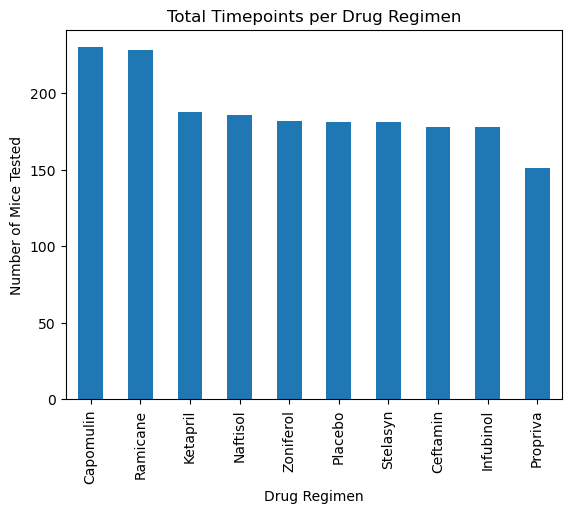

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
number_timepoints_df = clean_data.groupby(["Drug Regimen"]).count()["Timepoint"].sort_values(ascending=False)
timepoints_graph = number_timepoints_df.plot(kind="bar", title = "Total Timepoints per Drug Regimen")
timepoints_graph.set_xlabel("Drug Regimen")
timepoints_graph.set_ylabel("Number of Mice Tested")

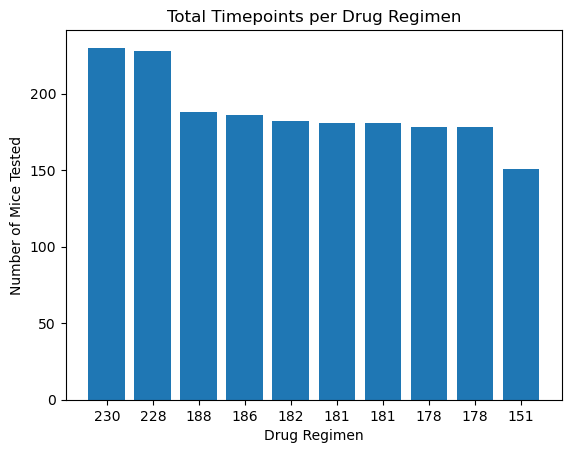

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
number_timepoints_df = clean_data.groupby(["Drug Regimen"]).count()["Timepoint"].sort_values(ascending=False)

x_df = np.arange(0,len(number_timepoints_df))
plt.bar(x_df,number_timepoints_df)
ticks = [x for x in x_df]
plt.xticks(ticks,number_timepoints_df)
plt.title("Total Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

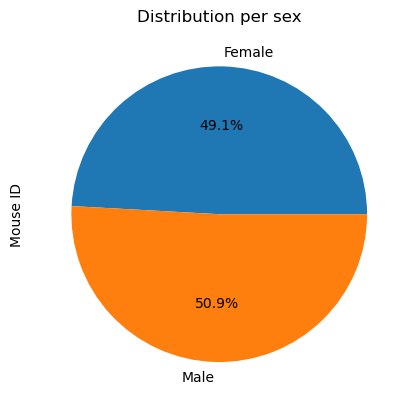

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
per_sex_mice = clean_data.groupby(["Sex"]).count()["Mouse ID"]
sex_graph = per_sex_mice.plot(kind="pie",autopct='%1.1f%%', title = "Distribution per sex")

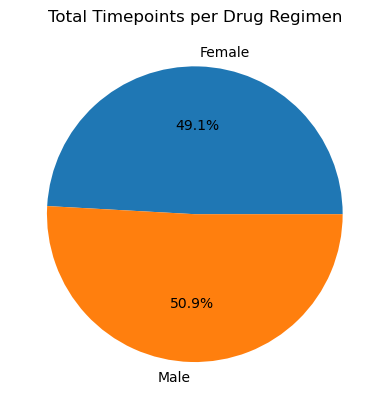

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
per_sex_mice = clean_data.groupby(["Sex"]).count()["Mouse ID"]
plt.pie(per_sex_mice,autopct='%1.1f%%',labels=["Female","Male"])
plt.title("Total Timepoints per Drug Regimen")
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments_data_df  = clean_data[clean_data["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]
reduced_treatments_df = pd.DataFrame({"Mouse ID" : treatments_data_df["Mouse ID"],
                               "Timepoint" : treatments_data_df["Timepoint"]})

# Start by getting the last (greatest) timepoint for each mouse
reduced_treatments_df.sort_values("Mouse ID", ascending=True)
reduced_treatments_df.groupby(["Mouse ID"]).max()["Timepoint"]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
reduced_treatments_all_df = pd.merge(reduced_treatments_df,clean_data,  how="left", on=["Mouse ID", "Timepoint"])
reduced_treatments_all_df.sort_values("Drug Regimen", ascending=True)
reduced_treatments_all_df.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,c326,0,45.0,0,Infubinol,Female,18,25


In [41]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    df = reduced_treatments_all_df[(reduced_treatments_all_df["Drug Regimen"] == treatment)]["Tumor Volume (mm3)"]
    
    quartiles = df.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    list_outliners = []
    
    for key,value in df.items():
        
        valor = df[key]
        if  (float(valor)<lower_bound) or (float(valor)>upper_bound):
            
            list_outliners.append(valor)
        
    print(f"For treatment {treatment} potential outliers: {list_outliners}")    

For treatment Capomulin potential outliers: [25.47214326, 23.34359787]
For treatment Ramicane potential outliers: [22.05012627]
For treatment Infubinol potential outliers: []
For treatment Ceftamin potential outliers: []


In [37]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

## Line and Scatter Plots

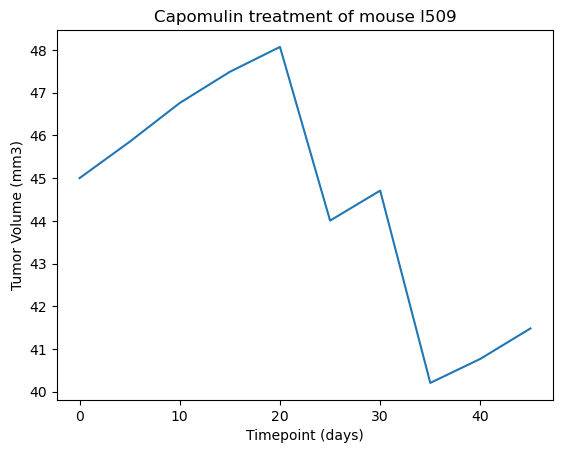

In [29]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


mouse_data_df  = clean_data[(clean_data["Mouse ID"] == "l509")]
reduced_mouse_df = pd.DataFrame({"Average Tumor Volume (mm3)" : mouse_data_df["Tumor Volume (mm3)"],
                                "Timepoint" : mouse_data_df["Timepoint"],
                               "Weight (g)" : mouse_data_df["Weight (g)"]})

 
plt.plot(reduced_mouse_df["Timepoint"], reduced_mouse_df["Average Tumor Volume (mm3)"])

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

plt.show()

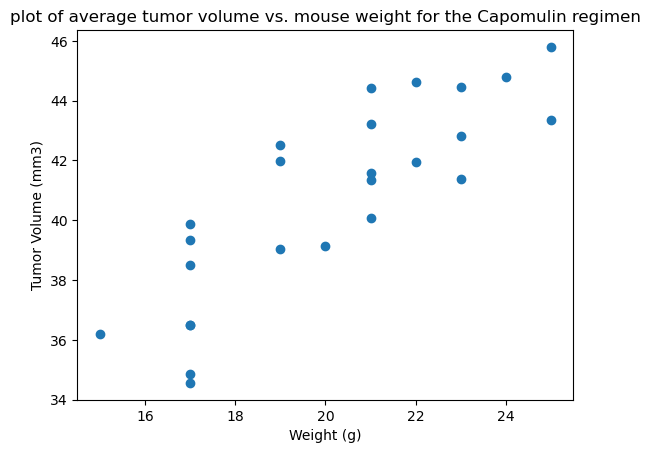

In [30]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_data_df  = clean_data[(clean_data["Drug Regimen"] == "Capomulin")]
reduced_Capomulin_df = pd.DataFrame({"Mouse ID" : Capomulin_data_df["Mouse ID"],
                                "Tumor Volume (mm3)" : Capomulin_data_df["Tumor Volume (mm3)"],
                               "Weight (g)" : Capomulin_data_df["Weight (g)"]})

reduced_Capomulin_df.sort_values("Weight (g)", ascending=True)
reduced_Capomulin_new_df = reduced_Capomulin_df.groupby(["Mouse ID","Weight (g)"]).mean()["Tumor Volume (mm3)"].to_frame().reset_index()


plt.scatter(reduced_Capomulin_new_df["Weight (g)"], reduced_Capomulin_new_df["Tumor Volume (mm3)"])

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("plot of average tumor volume vs. mouse weight for the Capomulin regimen")

plt.show()

## Correlation and Regression

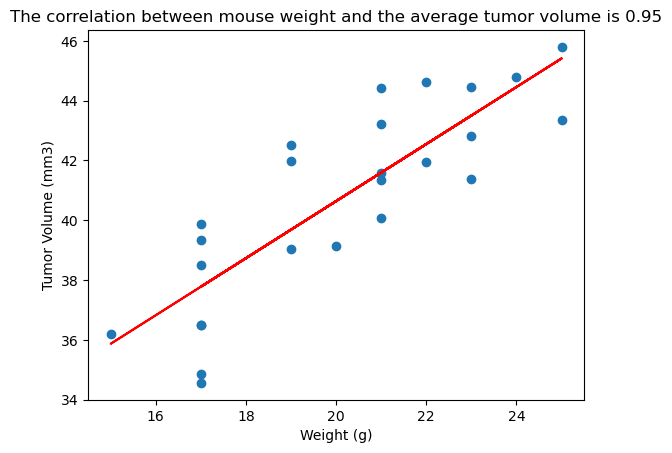

In [33]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = reduced_Capomulin_new_df['Weight (g)']
y_values = reduced_Capomulin_new_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title(f"The correlation between mouse weight and the average tumor volume is {str(round(slope,2))}")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()